In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transform
import matplotlib.pyplot as plt

Load MNIST dataset for the data loader

In [2]:
train_set = datasets.MNIST(root = " ",
                           train = True,
                           transform = transform.ToTensor(),
                           download = True)

test_set = datasets.MNIST(root = " ",
                           train = False,
                           transform = transform.ToTensor(),
                           download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 143802374.97it/s]


Extracting  /MNIST/raw/train-images-idx3-ubyte.gz to  /MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 72710500.49it/s]


Extracting  /MNIST/raw/train-labels-idx1-ubyte.gz to  /MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45824883.36it/s]

Extracting  /MNIST/raw/t10k-images-idx3-ubyte.gz to  /MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 23724195.23it/s]

Extracting  /MNIST/raw/t10k-labels-idx1-ubyte.gz to  /MNIST/raw



In [3]:
print("No of class", train_set.classes)

No of class ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [4]:
print("train_set.data.shape", train_set.data.shape)
print("test_set.data.shape", test_set.data.shape)

train_set.data.shape torch.Size([60000, 28, 28])
test_set.data.shape torch.Size([10000, 28, 28])


data loader

In [5]:
train_loader = DataLoader(train_set, batch_size= 64, shuffle = True)
test_loader = DataLoader(test_set, batch_size= 64, shuffle = False)

Visualize several MNIST datasets

In [6]:
for images, labels in train_loader:
  print(images.shape , labels.shape)
  break

torch.Size([64, 1, 28, 28]) torch.Size([64])


data visualizing

In [7]:
dataiter = iter(train_loader)
for i in range(1):
    images, labels = next(dataiter)
    print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


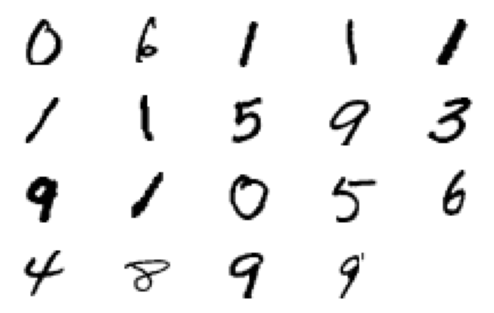

In [8]:
figure = plt.figure()
num_of_images= 20

for index in range(1 , num_of_images):
  plt.subplot(5,5, index)
  plt.axis("off")
  plt.imshow(images[index].numpy().squeeze(), cmap = "gray_r")

ANN model

In [9]:
class ANN(nn.Module):
  def __init__(self):
    super(ANN, self).__init__()

    self.fc1 = nn.Linear(28*28, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)

    self.relu = nn.ReLU()

  def forward(self , x):

    out = x.view(-1 , 28*28)
    out = self.fc1(out)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    out = self.relu(out)
    out = self.fc4(out)

    return out

In [10]:
model = ANN()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

training the model

In [11]:
epochs = 10

training_loss = []
testing_loss = []
training_acc = []
testing_acc = []

for epoch in range(epochs):
  train_loss = 0.0
  train_acc = 0.0

  model.train()
  for images , labels in train_loader:
    output = model(images)

    optimizer.zero_grad()

    loss = loss_fn(output, labels)

    loss.backward()
    optimizer.step()

    prediction = torch.argmax(output, 1)

    train_acc += (prediction == labels).sum().item()
    train_loss += loss.item()

  training_acc.append(train_acc/len(train_set))
  training_loss.append(train_loss/len(train_loader))

  test_loss = 0.0
  test_acc = 0.0

  with torch.no_grad():
    for images, labels in test_loader:
      output = model(images)
      loss = loss_fn(output, labels)
      prediction = torch.argmax(output, 1)

    test_acc += (prediction == labels).sum().item()
    test_loss += loss.item()

  testing_acc.append(train_acc/len(test_set))
  testing_loss.append(train_loss/len(test_loader))

  print ("Epoch {}, Training Accuracy {}, Training Loss {}, Testing Loss{}".format(
      epoch+1 , train_acc/len(train_set), test_acc/len(test_set), train_loss/len(train_loader), test_loss/len(test_loader)
  ))



Epoch 1, Training Accuracy 0.1141, Training Loss 0.0002, Testing Loss2.3018657401172335
Epoch 2, Training Accuracy 0.12131666666666667, Training Loss 0.0002, Testing Loss2.294769640670402
Epoch 3, Training Accuracy 0.15001666666666666, Training Loss 0.0003, Testing Loss2.2864364614364687
Epoch 4, Training Accuracy 0.19995, Training Loss 0.0003, Testing Loss2.2757638420885815
Epoch 5, Training Accuracy 0.24858333333333332, Training Loss 0.0005, Testing Loss2.261571861025113
Epoch 6, Training Accuracy 0.4069, Training Loss 0.001, Testing Loss2.241337714927283
Epoch 7, Training Accuracy 0.5508333333333333, Training Loss 0.0011, Testing Loss2.2104602879298523
Epoch 8, Training Accuracy 0.6109, Training Loss 0.0011, Testing Loss2.160235590009547
Epoch 9, Training Accuracy 0.6175166666666667, Training Loss 0.0012, Testing Loss2.0736272089771117
Epoch 10, Training Accuracy 0.6034833333333334, Training Loss 0.0012, Testing Loss1.9248822042936964


[]

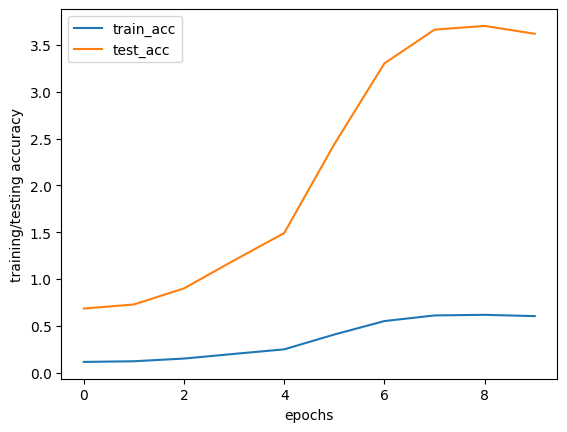

In [12]:
plt.plot(range(epochs), training_acc, label = "train_acc")
plt.plot(range(epochs), testing_acc, label = "test_acc")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("training/testing accuracy")
plt.plot()